### FLIGHT PRICE PREDICTION
-- DONE BY SOUMYADEEP SENGUPTA <br/>
a kaggle project <br/>
data source : "https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh?select=Data_Train.xlsx"

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


import warnings

warnings.filterwarnings('ignore')

In [257]:
sns.set()

##### Train Data : 

In [258]:
#IMPORT TRAIN DATA

data = pd.read_excel("Data_Train.xlsx", sheet_name=0)
pd.set_option("display.max_columns", None)

In [259]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Data preprocessing


In [261]:
#check Num of missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

there is very few amount of null value present there we have to check that

In [262]:
data.shape

(10683, 11)

In [263]:
data.dropna(inplace=True)

In [264]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [265]:
data.shape

(10682, 11)

###### NOTE:
Duration : column has 2hrs 15 min so we have to preprocess the value
    

In [266]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
3h 25m       1
41h 20m      1
42h 45m      1
32h 55m      1
33h 20m      1
Name: Duration, Length: 368, dtype: int64

We can see the data columns 
- ` Date_of journey` --> In String format we have to convert to date time format
- `Dep_time` -->In String format we have to process 
- `Arraival_Time` --> in string format 
- `Duration` --> In String format we have to process 



In [267]:
#import datetime as dt 
data["Journey_Day"] = pd.to_datetime(data.Date_of_Journey , format= "%d/%m/%Y").dt.day

In [268]:
data["Journey_Month"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [269]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [270]:
#Now drop DAte_of_Journey
data.drop(['Date_of_Journey'] , axis=1 , inplace=True)

In [271]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [272]:
#extract data from depture time

data["Dept_hour"] = pd.to_datetime(data.Dep_Time ).dt.hour
data["Dept_minute"] = pd.to_datetime(data.Dep_Time ).dt.minute

In [273]:
data.drop(["Dep_Time"] ,axis=1 , inplace=True)

In [274]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [275]:
# similerly work with arrival time
data["Arr_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["Arr_minute"] = pd.to_datetime(data.Arrival_Time ).dt.minute
data.drop(["Arrival_Time"] ,axis=1 , inplace=True)

In [276]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [277]:
# Preprocessing for duration


#below customised function is for to create "2h" to "2h 0m" form

duration = list(data.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] =duration[i].strip() + ' 0m'
        else:
            duration[i]= "0h "+ duration[i].strip()
            
duration_hours=[]
duration_min=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_min.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [278]:
data['Duration_hours'] = duration_hours
data['Duration_min'] = duration_min
data.drop(['Duration'] , axis=1 , inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


##### Handling Categorical Data

1. Nominal Data (data dont have any order i.e state) -> OneHotEncoder
2. Ordinal Data (Data are in Order ie. ranking) -> LabelEncoder

In [279]:
data.Airline.value_counts()  #Nominal Data -> OneHot encoding to convert norminal data to numarical data

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

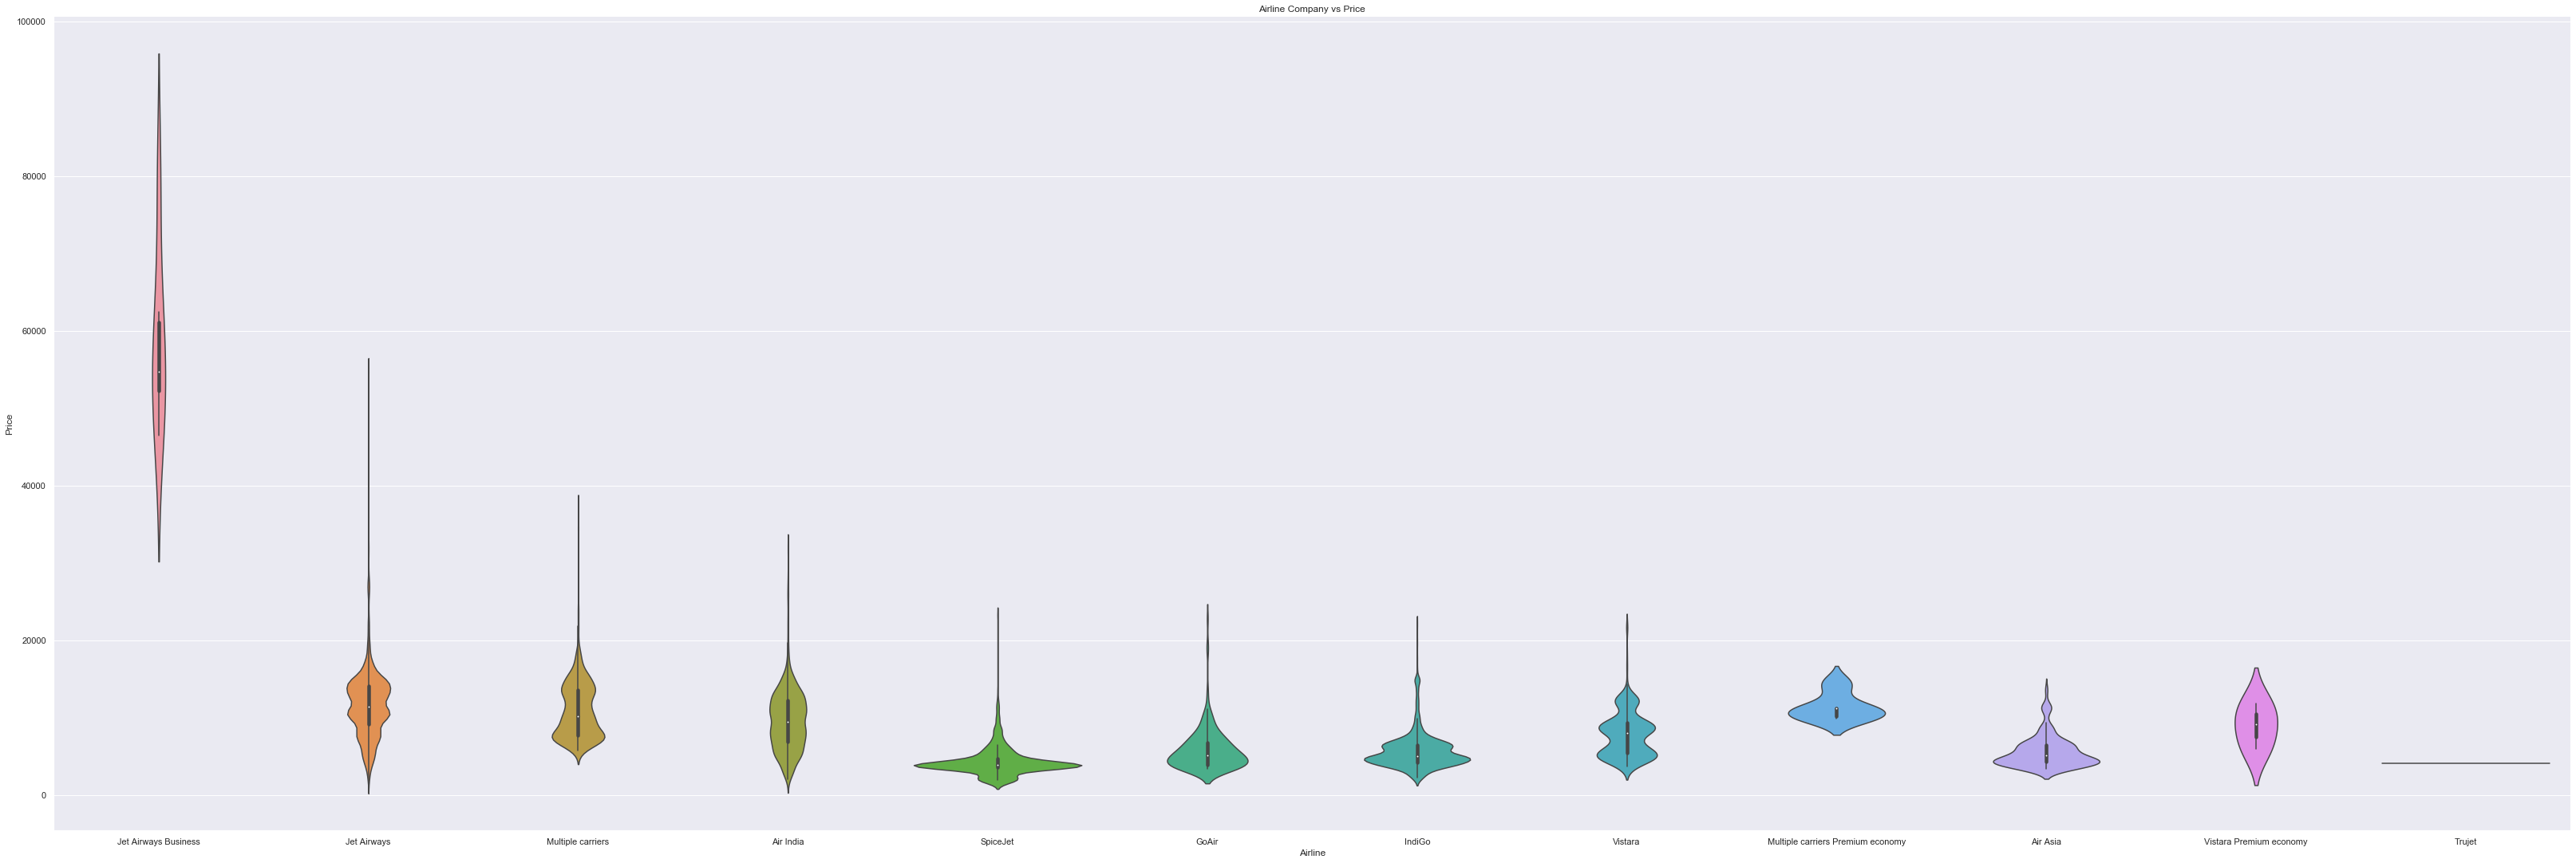

In [280]:
# NOW DRAW CATEGORY DATA AND COMPARE WITH PRICE -> TO SEE WHICH AIRWAYS COMPANY HAS HIGH -LOW PRICE

sns.catplot(y = "Price" , x = 'Airline' ,data = data.sort_values('Price' , ascending = False) ,kind='violin',height = 15 , aspect=3)
plt.title("Airline Company vs Price")

plt.show()

we can see `Jet airways` has the highest price in this segment

In [281]:
#As Airline is a Nominal Categorical data we will perform one hot encoding

Airline = data[['Airline']]
Airline = pd.get_dummies(Airline , drop_first=True)
print(type(Airline))
Airline.head()

<class 'pandas.core.frame.DataFrame'>


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [282]:
data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [283]:
#As Source is a Nominal Categorical data we will perform one hot encoding

source = data[['Source']]
source = pd.get_dummies(source , drop_first=True)
print(type(source))
source.head()

<class 'pandas.core.frame.DataFrame'>


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


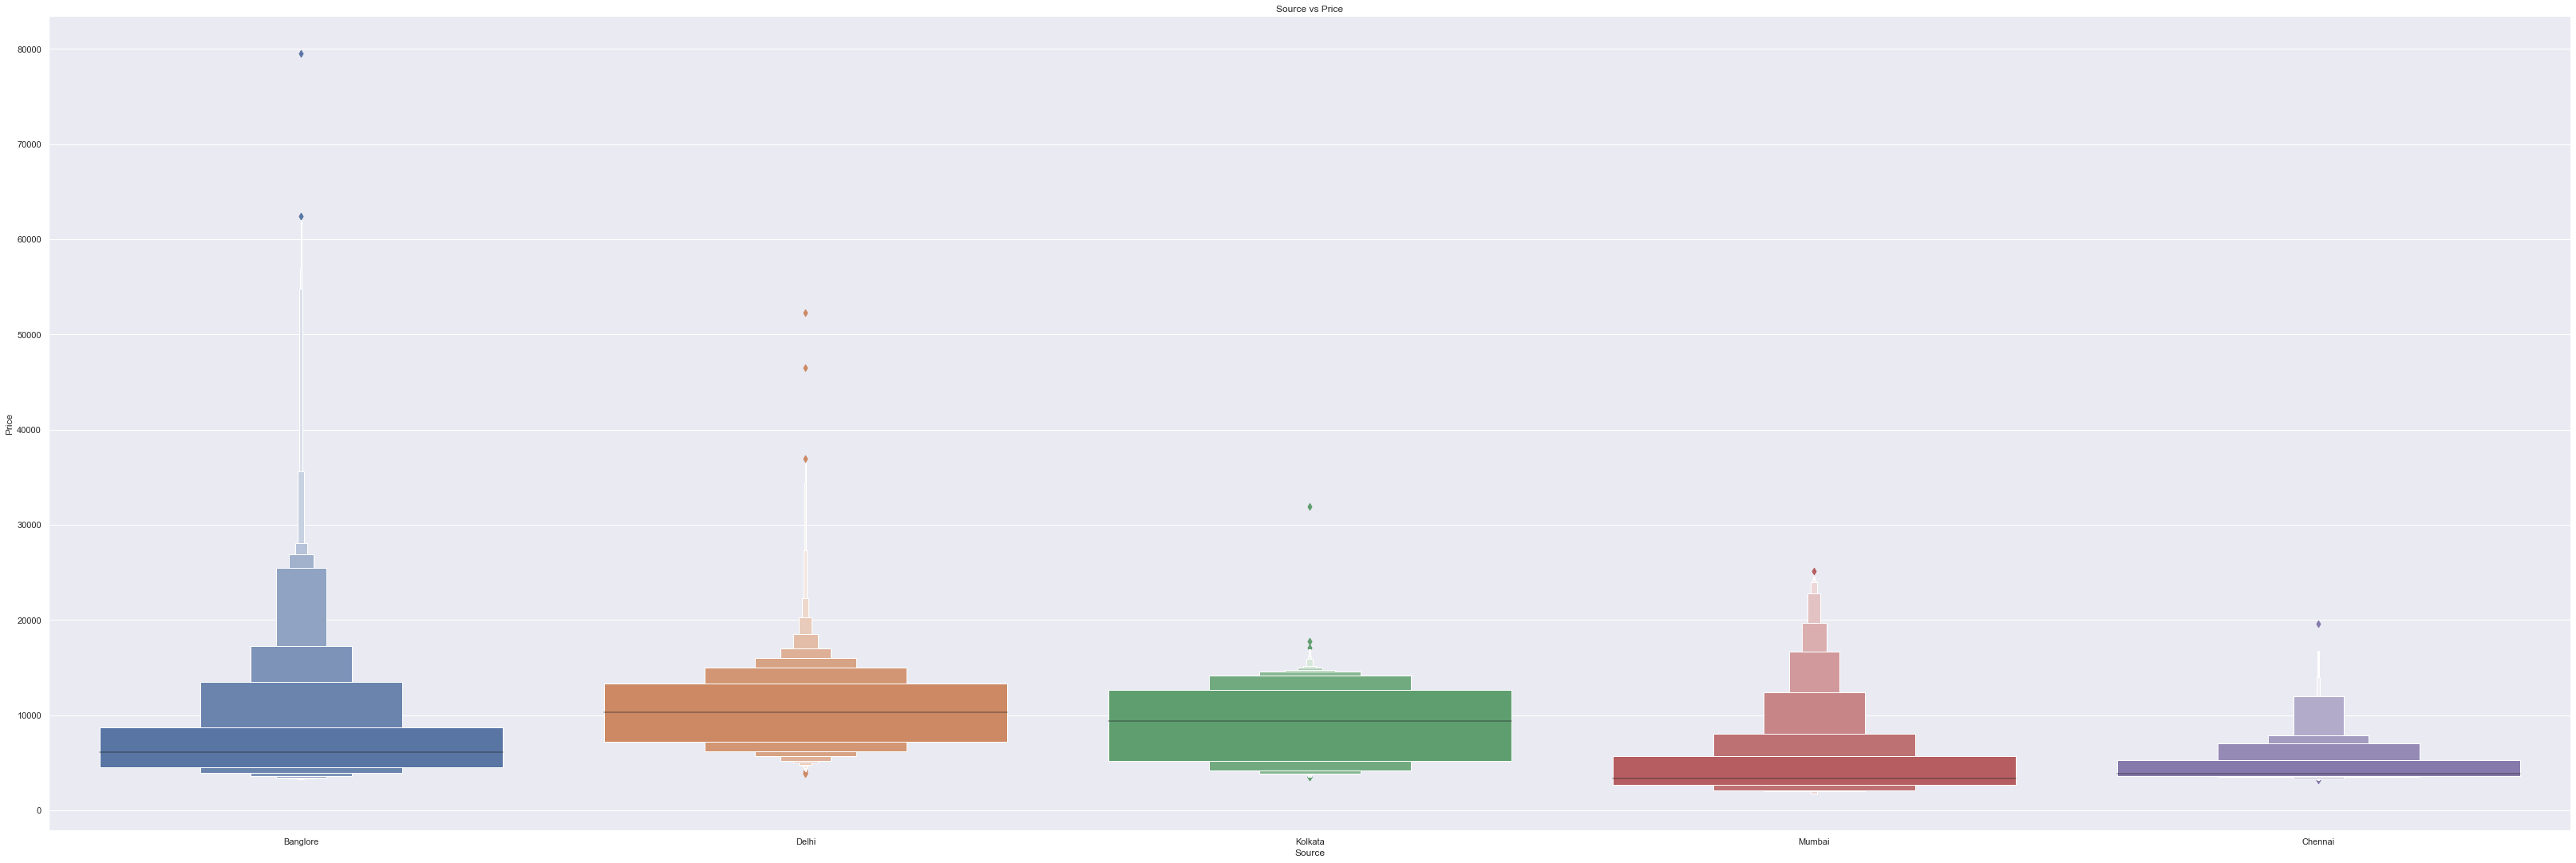

In [284]:
# NOW DRAW CATEGORY DATA AND COMPARE WITH PRICE -> TO SEE WHICH Source HAS HIGH -LOW PRICE

sns.catplot(y = "Price" , x = 'Source' ,data = data.sort_values('Price' , ascending = False) ,kind='boxen',height = 15 , aspect=3)
plt.title("Source vs Price")

plt.show()

In [285]:
data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [286]:
#As Destination is a Nominal Categorical data we will perform one hot encoding

dest = data[['Destination']]
dest = pd.get_dummies(dest , drop_first=True)

dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


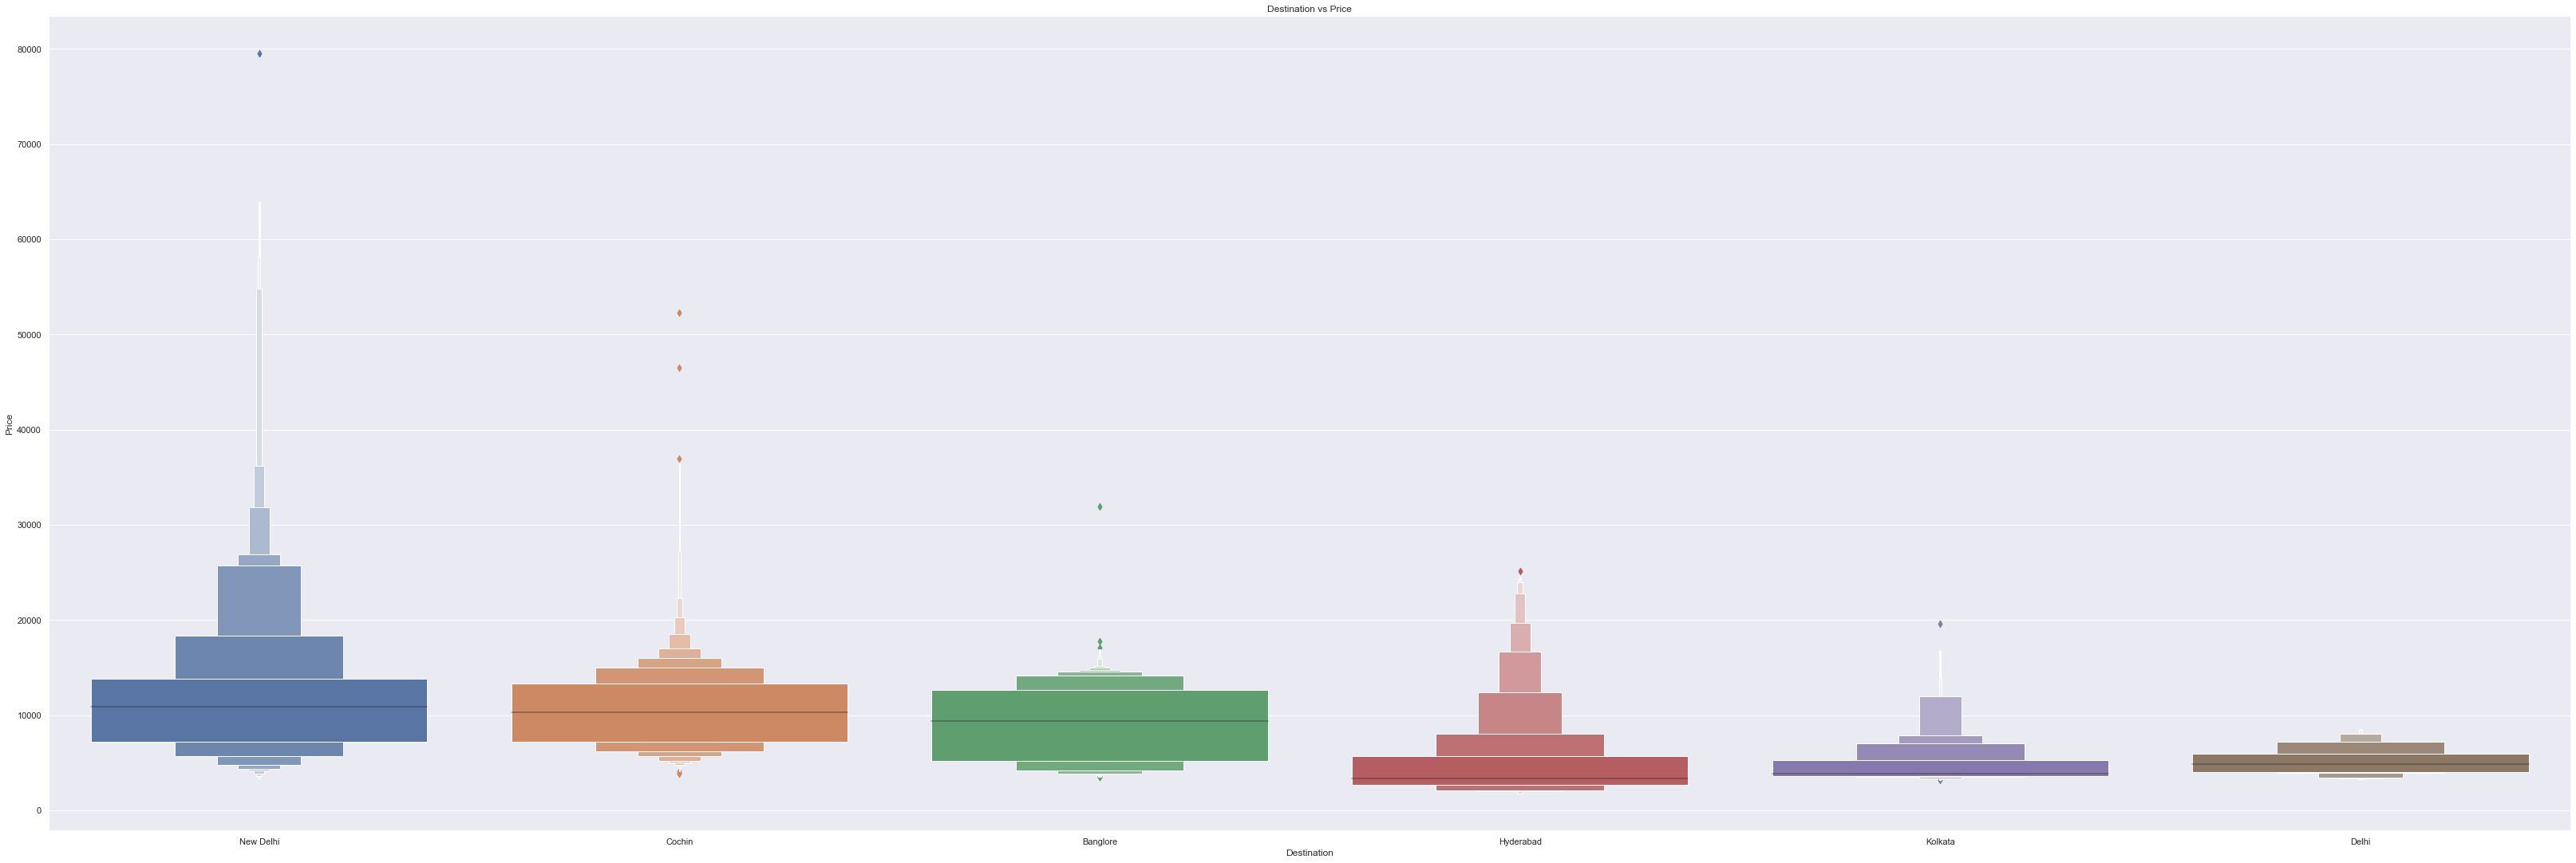

In [287]:
# NOW DRAW CATEGORY DATA AND COMPARE WITH PRICE -> TO SEE WHICH Source HAS HIGH -LOW PRICE

sns.catplot(y = "Price" , x = 'Destination' ,data = data.sort_values('Price' , ascending = False) ,kind='boxen',height = 15 , aspect=3)
plt.title("Destination vs Price")

plt.show()

In [288]:
data.Route


0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [289]:
data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

We can see `route` is similar to the stops and most of the additional info is No info so we are dropping the colums

In [290]:
data.drop(['Route','Additional_Info'], axis=1 , inplace=True)

In [291]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [292]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [293]:
#Here Stop is a ordinal value so we will do levelencoding
data.replace({'non-stop':0 ,'1 stop':1, '2 stops':2 , '3 stops' : 3 , '4 stops' : 4 } , inplace=True)

In [294]:
data.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

Now concatinate all the Categorical data with the main dataset

In [295]:
data_train = data

In [296]:
train_data = pd.concat([data,Airline,source,dest] , axis=1)

In [297]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [298]:
train_data.drop(["Airline","Source","Destination"], inplace=True , axis=1)

In [299]:
train_data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [300]:
train_data.shape

(10682, 30)

###### Test data :

In [301]:
#Import Test Data
data = pd.read_excel('Test_set.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [302]:
data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


##### Data Cleaning

In [304]:
# check Null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

there is no missing value so can proceed 

In [305]:
#Now convert catagorical data into numarical value

data.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [306]:
airlines_test = data[['Airline']]
airlines_test = pd.get_dummies(airlines_test , drop_first=True)
airlines_test.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [307]:
source_test = data[['Source']]
source_test = pd.get_dummies(source_test , drop_first=True)
source_test.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [308]:
destination_test = data[['Destination']]
destination_test = pd.get_dummies(destination_test , drop_first=True)
destination_test.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [309]:
#Total_stop 
data.Total_Stops.value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [310]:
data.replace({'1 stop':1 , 'non-stop':0 , '2 stops':2 , '3 stops':3 , '4 stops':4 } , inplace=True)

In [311]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info


In [312]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   int64 
 9   Additional_Info  2671 non-null   object
dtypes: int64(1), object(9)
memory usage: 208.8+ KB
None


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info


Now we will merge the tables and delete the Not so important values


In [313]:
test_data = pd.concat([data,airlines_test,source_test,destination_test],axis=1)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [314]:
test_data.drop(['Airline','Source','Destination' ,'Route' , 'Additional_Info'],inplace=True , axis=1)

In [315]:
test_data.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,06:20,10:20,4h,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,19:15,19:00 22 May,23h 45m,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,08:00,21:00,13h,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [316]:
test_data["Journey_Day"] = pd.to_datetime(test_data.Date_of_Journey , format= "%d/%m/%Y").dt.day

In [317]:
test_data["Journey_Month"] = pd.to_datetime(test_data.Date_of_Journey , format= "%d/%m/%Y").dt.month
test_data.drop('Date_of_Journey' , axis=1 , inplace=True)
test_data.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month
0,17:30,04:25 07 Jun,10h 55m,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,6
1,06:20,10:20,4h,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5
2,19:15,19:00 22 May,23h 45m,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5
3,08:00,21:00,13h,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5
4,23:55,02:45 25 Jun,2h 50m,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,24,6


In [318]:
# similerly work with arrival time
test_data["Arr_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arr_minute"] = pd.to_datetime(test_data.Arrival_Time ).dt.minute
test_data.drop(["Arrival_Time"] ,axis=1 , inplace=True)

#extract data from depture time

test_data["Dept_hour"] = pd.to_datetime(test_data.Dep_Time ).dt.hour
test_data["Dept_minute"] = pd.to_datetime(test_data.Dep_Time ).dt.minute
test_data.drop(["Dep_Time"] ,axis=1 , inplace=True)

In [319]:
test_data.head()

,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Arr_hour,Arr_minute,Dept_hour,Dept_minute
0,10h 55m,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,6,4,25,17,30
1,4h,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,10,20,6,20
2,23h 45m,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5,19,0,19,15
3,13h,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5,21,0,8,0
4,2h 50m,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,24,6,2,45,23,55


In [320]:
duration = list(test_data.Duration)

#below customised function is for to create "2h" to "2h 0m" form


for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] =duration[i].strip() + ' 0m'
        else:
            duration[i]= "0h "+ duration[i].strip()
            
duration_hours=[]
duration_min=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_min.append(int(duration[i].split(sep = 'm')[0].split()[-1])) 

In [321]:
test_data['Duration_hours'] = duration_hours
test_data['Duration_min'] = duration_min
test_data.drop(['Duration'] , axis=1 , inplace=True)
test_data.head()

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Arr_hour,Arr_minute,Dept_hour,Dept_minute,Duration_hours,Duration_min
0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,6,4,25,17,30,10,55
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,10,20,6,20,4,0
2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5,19,0,19,15,23,45
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5,21,0,8,0,13,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,24,6,2,45,23,55,2,50


In [322]:
test_data.shape

(2671, 28)

#### Feature Selection :
Finding out the best features
1. Heatmap
2. Feature_importance_
3. SelectKBest

In [323]:
train_data.shape

(10682, 30)

In [324]:
train_data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [325]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dept_hour',
       'Dept_minute', 'Arr_hour', 'Arr_minute', 'Duration_hours',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [326]:
X = train_data.loc[:,['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dept_hour',
       'Dept_minute', 'Arr_hour', 'Arr_minute', 'Duration_hours',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [327]:
y = train_data.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

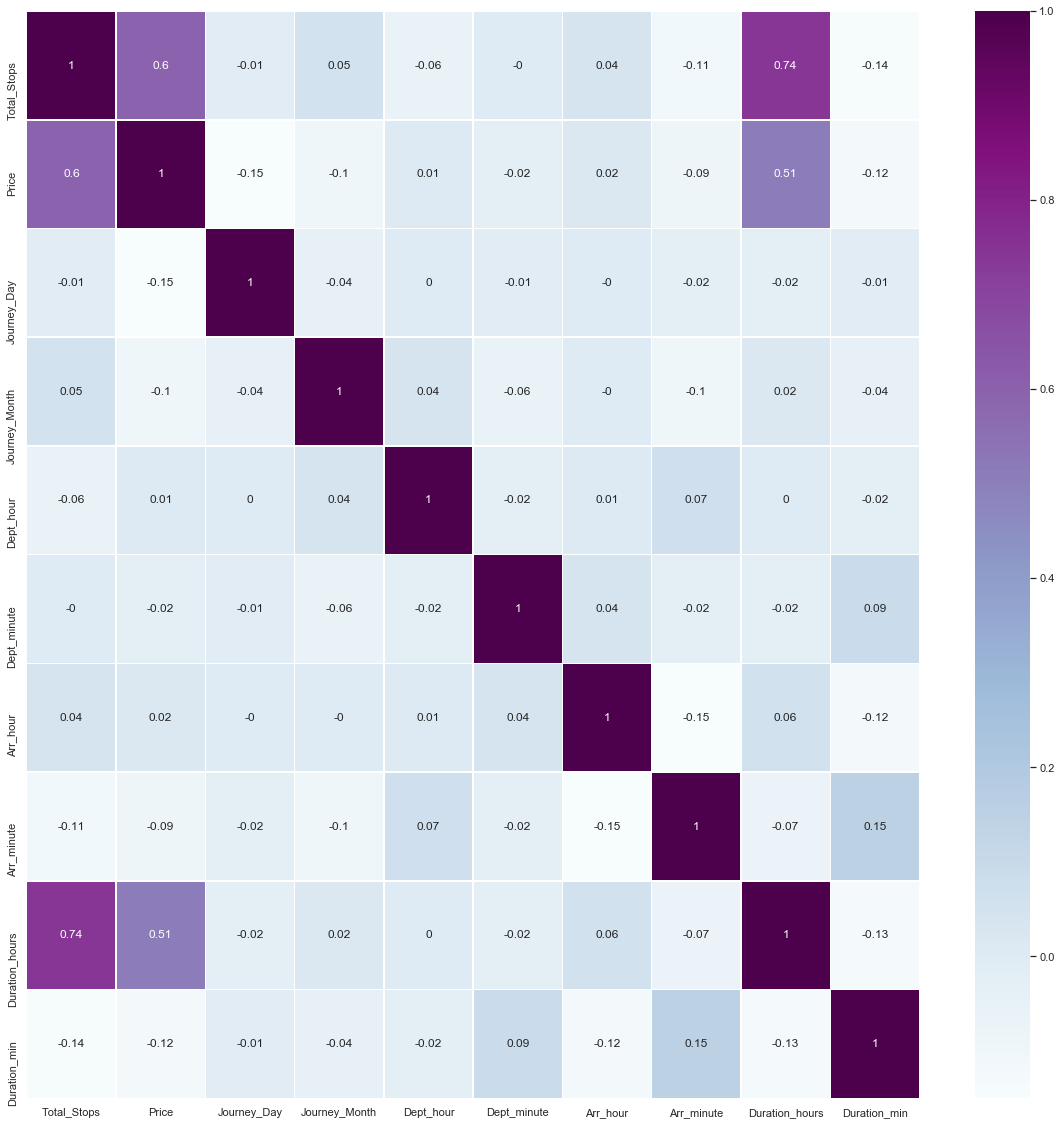

In [328]:
#Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(round(data_train.corr(),2), annot=True , cmap="BuPu" ,linewidths=.5)
plt.show()

In [329]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [330]:
print(selection.feature_importances_)

[2.37908099e-01 1.44021152e-01 5.36730975e-02 2.43131698e-02
 2.12979356e-02 2.85562142e-02 1.90148183e-02 1.09245516e-01
 1.70706803e-02 1.02391018e-02 1.63186012e-03 1.79265703e-02
 1.39912572e-01 6.71843517e-02 1.96419022e-02 8.61668010e-04
 2.78271198e-03 1.07446954e-04 5.28121406e-03 8.71647065e-05
 5.58250881e-04 1.03751074e-02 3.25951527e-03 7.32355215e-03
 1.11886263e-02 1.57457289e-02 5.61539172e-03 4.90786850e-04
 2.46857945e-02]


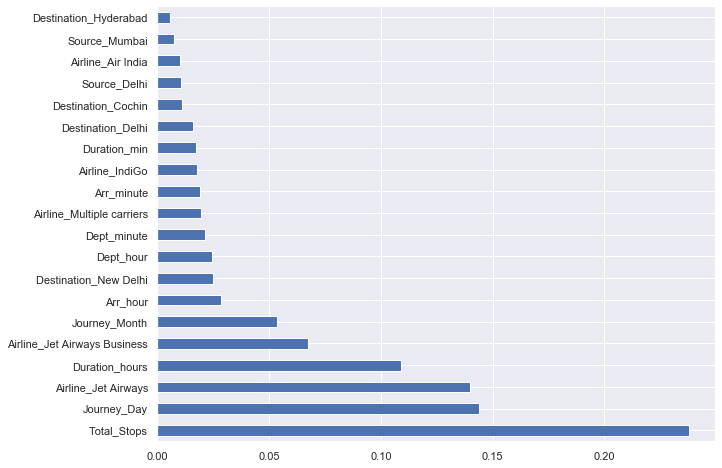

In [331]:
plt.figure(figsize=(10,8))
feat_importance = pd.Series(selection.feature_importances_ , index= X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

##### Fitting Model using Random Forest
1. Split dataset into test train 
2. if needed do scaling
3. Import model
4. fit data
5. Predict wrt X_test
6. In regression check RSME Score
7. Plot graph


In [334]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y ,test_size = .3, random_state=20)

In [335]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [338]:
y_pred = reg_rf.predict(X_test)

In [339]:
reg_rf.score(X_test,y_test)

0.7748213138946813

In [340]:
reg_rf.score(X_train,y_train)

0.95769579895276

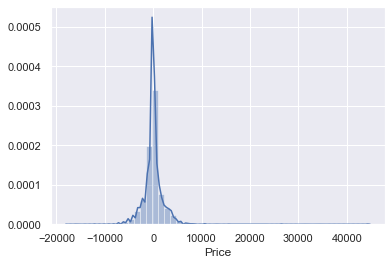

In [341]:
sns.distplot(y_test-y_pred)

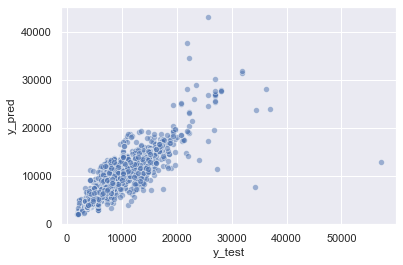

In [342]:
sns.scatterplot(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [344]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('MAE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  1230.29618863687
MSE:  4578213.557549112
MAE:  2139.6760403269254


In [345]:
print('R2_score: ',metrics.r2_score(y_test,y_pred))

R2_score:  0.7748213138946813


###### Hyperparameter Tuning:

In [346]:
from sklearn.model_selection import RandomizedSearchCV

In [349]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200 , num=12)]

#Num of features to consider at every split
max_features=['auto' , 'sqrt']

max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [350]:
#creste random_grid

random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth ,'min_samples_split':min_samples_split ,'min_samples_leaf':min_samples_leaf  
    
}

In [351]:
rf_random = RandomizedSearchCV(estimator = reg_rf ,
    param_distributions = random_grid , scoring = 'neg_mean_squared_error' , n_iter = 20 , cv=5 , verbose=5 , random_state=50 , n_jobs=1)

In [352]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, score=-5686382.113, total=   4.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, score=-4069213.295, total=   5.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, score=-4869806.820, total=   5.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, score=-2858422.538, total=   5.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, score=-4489070.637, total=   5.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, score=-4936369.675, total=  10.3s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, score=-3670022.288, total=   9.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, score=-4108743.100, total=   9.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto,

[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, score=-8133416.945, total=   7.9s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, score=-6997101.581, total=   7.7s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, score=-8530110.163, total=   7.8s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, score=-5291909.158, total=   7.8s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto,

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5, score=-6817518.091, total=   2.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5, score=-7438970.990, total=   2.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5, score=-4663126.826, total=   2.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5, score=-7591939.372, total=   2.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_feat

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=50, scoring='neg_mean_squared_error',
                   verbose=5)

In [353]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [354]:
prediction = rf_random.predict(X_test)

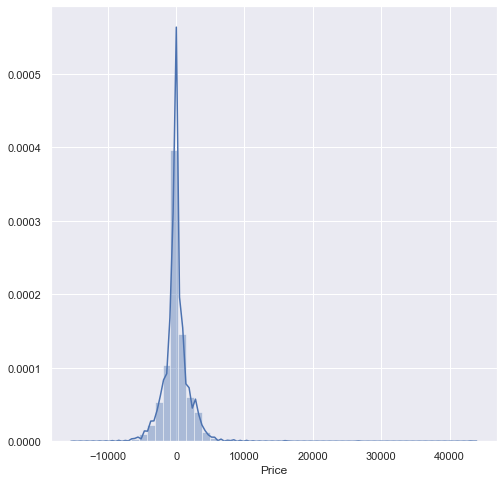

In [356]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

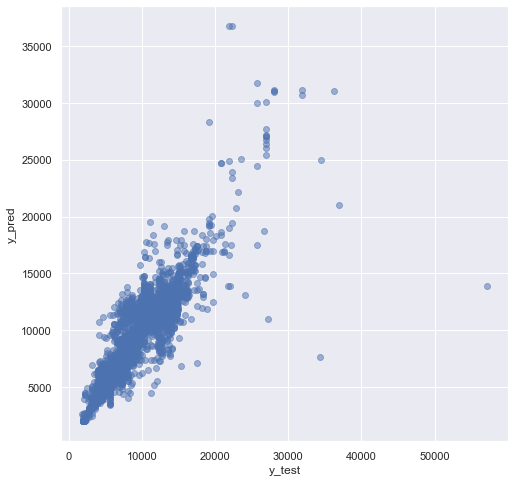

In [357]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction ,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [358]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('MAE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  1196.852934466429
MSE:  4209511.521421476
MAE:  2051.709414469183


#### SAVE Model and reuse it again

In [363]:
import pickle

#open a file and save the model 
file = open("Flight_predict.pkl" ,'wb')


#dump info to that file
pickle.dump(rf_random,file)

In [364]:
model = open('Flight_predict.pkl' ,'rb')
forest = pickle.load(model)

In [365]:
y_prediction = forest.predict(X_test)

In [366]:
metrics.r2_score(y_test,y_prediction)

0.7929558633244862